<a href="https://colab.research.google.com/github/KSK4H/Mini-Project/blob/main/Myproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install numpy==1.24.4 scikit-learn==1.3.2

# New Section

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [3]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/crop.csv')
df.head()

Mounted at /content/drive


,N,P,K,temperature,humidity,ph,rainfall,Crop Name,Yield
0,71,11,24,20.756834,47.368220,6.730602,364.587903,mango,86.042064
1,112,35,51,21.568443,74.711341,6.250531,148.512204,orange,163.059584
2,34,22,65,33.215061,84.630039,6.288119,154.318706,muskmelon,129.686617
3,91,56,16,27.912439,71.686600,6.579295,271.515730,apple,136.003516
4,80,40,49,32.372557,51.114553,5.674448,203.097574,watermelon,139.663304


In [4]:
# Define features and target
#sklearn
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop Name']]
y = df['Yield']

numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
categorical_features = ['Crop Name']

# Create transformers
imputer = SimpleImputer(strategy='median')
encoder = OneHotEncoder(handle_unknown='ignore')

numerical_transformer = Pipeline(steps=[
    ('imputer', imputer),
    ('scaler', StandardScaler())
])

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', encoder, categorical_features)
    ]
)

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)



In [5]:
# Define models (excluding MLPRegressor for now)
#sklearn,xboost,lightgbm,numpy
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor()
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models and evaluate performance
model_pipelines = {}
performance_metrics = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('poly', poly),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    model_pipelines[name] = pipeline
    performance_metrics[name] = {
        'R² Score': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    }

# Print model performance
print("Model Performance:")
for name, metrics in performance_metrics.items():
    print(f"{name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name} = {metric_value:.4f}")
    print()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14776
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 233
[LightGBM] [Info] Start training from score 122.276061
Model Performance:
Linear Regression:
  R² Score = 0.9456
  MSE = 105.0241
  RMSE = 10.2481
  MAE = 8.4104

Decision Tree:
  R² Score = 0.8407
  MSE = 307.5734
  RMSE = 17.5378
  MAE = 14.0079

Random Forest:
  R² Score = 0.9285
  MSE = 138.0163
  RMSE = 11.7480
  MAE = 9.3874

SVR:
  R² Score = 0.6451
  MSE = 685.4751
  RMSE = 26.1816
  MAE = 19.3397

KNN:
  R² Score = 0.8472
  MSE = 295.1848
  RMSE = 17.1809
  MAE = 13.5796

XGBoost:
  R² Score = 0.9260
  MSE = 142.9195
  RMSE = 11.9549
  MAE = 9.6797

LightGBM:
  R² Score = 0.9361
  MSE = 123.3454
  RMSE = 11.1061
  MAE = 9.1111



<ipython-input-6-fadd5705095a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=r2_scores, y=model_names, palette="viridis")


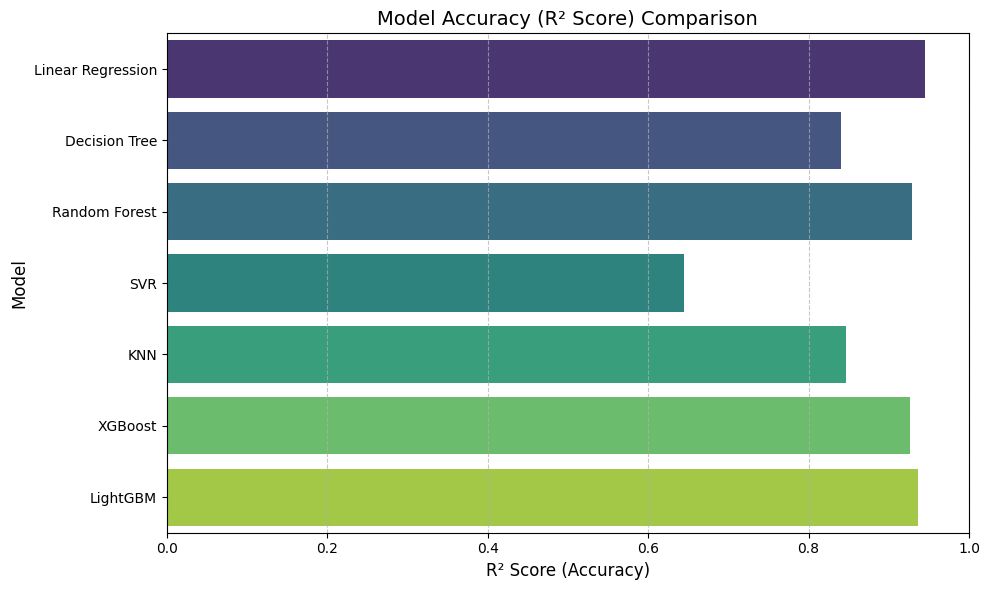

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

# Extract model names and R² scores
model_names = list(performance_metrics.keys())
r2_scores = [metrics['R² Score'] for metrics in performance_metrics.values()]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=r2_scores, y=model_names, palette="viridis")

# Add labels and title
plt.xlabel('R² Score (Accuracy)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model Accuracy (R² Score) Comparison', fontsize=14)
plt.xlim(0, 1)  # Since R² score is between 0 and 1
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [7]:
# Find the best model
best_model_name = max(performance_metrics, key=lambda k: performance_metrics[k]['R² Score'])
best_model_pipeline = model_pipelines[best_model_name]

print(f"Best Model: {best_model_name}")
print("Performance Metrics:")
for metric_name, metric_value in performance_metrics[best_model_name].items():
    print(f"  {metric_name} = {metric_value:.4f}")

Best Model: Linear Regression
Performance Metrics:
  R² Score = 0.9456
  MSE = 105.0241
  RMSE = 10.2481
  MAE = 8.4104


In [8]:
def get_user_input():

    temperature = float(input("Enter the temperature (°C): "))
    humidity = float(input("Enter the humidity (%): "))
    ph = float(input("Enter the pH level of the soil: "))
    rainfall = float(input("Enter the rainfall (mm): "))
    crop_name = input("Enter the crop name: ")
    N = float(input("Enter the current Nitrogen (N) level: "))
    P = float(input("Enter the current Phosphorus (P) level: "))
    K = float(input("Enter the current Potassium (K) level: "))

    current_conditions = {
        'temperature': temperature,
        'humidity': humidity,
        'ph': ph,
        'rainfall': rainfall,
        'Crop Name': crop_name,
        'N': N,
        'P': P,
        'K': K
    }

    return current_conditions

In [9]:
def predict_and_recommend(pipeline, current_conditions):

    # Convert current conditions dictionary to DataFrame
    conditions_df = pd.DataFrame([current_conditions])

    predicted_nutrients = pipeline.predict(conditions_df)

    # Check if predictions are in the expected shape
    if predicted_nutrients.ndim == 1:

        # If only one value is returned (e.g., for single output regression)
        predicted_nutrients = np.expand_dims(predicted_nutrients, axis=0)

    current_nutrients = np.array([current_conditions['N'], current_conditions['P'], current_conditions['K']])

    additional_amounts = predicted_nutrients - current_nutrients

    # Ensure additional_amounts is a 2D array
    if additional_amounts.ndim == 1:
        additional_amounts = np.expand_dims(additional_amounts, axis=0)

    extra_N, extra_P, extra_K = additional_amounts[0]

    result = {}
    suggestions = []


    if extra_N > 0 and extra_P > 0 and extra_K > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_N:.2f} kg/ha of N, {extra_P:.2f} kg/ha of P, and {extra_K:.2f} kg/ha of K.\nSuggestions:\nUse kelp or seaweed-based fertilizers to supply potassium and trace minerals.\nApply well-aged compost to provide a balanced mix of nutrients and improve soil fertility.\nUse organic manure (e.g., cow, chicken, or horse manure) to supplement N, P, and K levels naturally. ")
    elif extra_N > 0 and extra_P > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_N:.2f} kg/ha of N and {extra_P:.2f} kg/ha of P.\nSuggestions:\nUse wood ash to increase potassium levels and improve soil structure. Apply it sparingly to avoid excessive alkalinity.\nIncorporate composted organic materials to gradually supply both phosphorus and potassium, along with other essential nutrients.\nApply kelp meal or seaweed extracts to provide a natural source of potassium and trace minerals.")
    elif extra_N > 0 and extra_K > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_N:.2f} kg/ha of N and {extra_K:.2f} kg/ha of K.\nSuggestions:\nUse compost or well-rotted manure, which provides a balanced supply of nutrients, including nitrogen and potassium.\nAdd natural sources of potassium, such as wood ash, seaweed, or potassium-rich rock minerals (e.g., greensand).\nRotate crops to include nitrogen-fixing plants and those that benefit from increased potassium to balance nutrient levels over time.")
    elif extra_P > 0 and extra_K > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_P:.2f} kg/ha of P and {extra_K:.2f} kg/ha of K.\nSuggestions:\nBury or compost banana peels, which are an excellent source of potassium, to naturally boost potassium levels in the soil.\nUse well-composted animal manure, which provides both phosphorus and potassium, along with other essential nutrients.\nApply rock phosphate for a natural and long-lasting phosphorus source that enhances soil fertility over time.")
    elif extra_N > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_N:.2f} kg/ha of N.\nSuggestions:\nPlant legumes like beans, peas, or clover that have symbiotic bacteria in their roots to fix atmospheric nitrogen into the soil.\nSow green manures (e.g., alfalfa, hairy vetch) to add nitrogen to the soil when tilled back in.\nUse organic nitrogen-rich fertilizers like blood meal, fish emulsion, or feather meal to increase soil nitrogen levels.")
    elif extra_P > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_P:.2f} kg/ha of P.\nSuggestions:\nAdd bone meal, a slow-release organic fertilizer rich in phosphorus, to improve P levels in the soil.\nUse rock phosphate, a natural mineral that provides a slow, steady release of phosphorus.\nIncorporate well-decomposed compost and animal manure, which can gradually increase phosphorus content.\n")
    elif extra_K > 0:
        suggestions.append(f"\nRecommendations: \nAdd {extra_K:.2f} kg/ha of K.\nSuggestions:\nApply wood ash, as it is rich in potassium and acts as a quick-release organic source.\nIncorporate compost made from banana peels, which are naturally high in potassium.\nUse seaweed-based fertilizers or extracts that provide potassium along with trace minerals.")


    if extra_N <= 0:
        suggestions.append("\nRecommendations: \nN is more than expected or no extra N needed.\nSuggestions:\nApply high-carbon materials like straw to balance nitrogen.\nIntroduce nitrogen-fixing cover crops like legumes (e.g., clover, alfalfa, or beans) in crop rotation.\nReduce irrigation or manage it more carefully to prevent excess nitrogen from leaching deeper into the soil.")
    if extra_P <= 0:
        suggestions.append("\nRecommendations: \nP is more than expected or no extra P needed.\nSuggestions:\nUse manures low in phosphorus and balance nutrients with compost.\n Incorporate compost, leaf litter, or well-rotted manure to balance nutrients and encourage microbial activity that helps absorb excess phosphorus.\n Plant species like lupine or beans that help bind phosphorus in the soil, making it less available to other plants.")
    if extra_K <= 0:
        suggestions.append("\nRecommendations: \nK is more than expected or no extra K needed.\nSuggestions:\nIncorporate compost or well-rotted manure to balance soil nutrients and improve soil structure.\nApply organic mulch, such as straw or leaves, to reduce potassium leaching and improve soil health.\nPlant cover crops like clover or legumes to help absorb excess potassium and improve soil nutrient balance.")

    result['suggestions'] = suggestions

    return result

if __name__ == "__main__":
    current_conditions = get_user_input()
    recommendations = predict_and_recommend(pipeline, current_conditions)
    print("\n".join(recommendations['suggestions']))

Enter the temperature (°C): 40
Enter the humidity (%): 5
Enter the pH level of the soil: 8
Enter the rainfall (mm): 300
Enter the crop name: rice
Enter the current Nitrogen (N) level: 100
Enter the current Phosphorus (P) level: 80
Enter the current Potassium (K) level: 40

Recommendations: 
Add 80.08 kg/ha of N, 100.08 kg/ha of P, and 140.08 kg/ha of K.
Suggestions:
Use kelp or seaweed-based fertilizers to supply potassium and trace minerals.
Apply well-aged compost to provide a balanced mix of nutrients and improve soil fertility.
Use organic manure (e.g., cow, chicken, or horse manure) to supplement N, P, and K levels naturally. 


In [10]:
import joblib

# Save the best model pipeline
joblib.dump(best_model_pipeline, 'best_model_pipeline.joblib')

# Save the preprocessor and polynomial features separately if needed
joblib.dump(preprocessor, 'preprocessor.joblib')
joblib.dump(poly, 'polynomial_features.joblib')

['polynomial_features.joblib']